# **Projeto Final**

## **Rede de transporte metropolitano SP**

O projeto deste módulo consiste em modelar a **rede de transporte metropolitano de SP** como um grafo.

A rede a ser implementada é a que está [neste arquivo.](http://www.metro.sp.gov.br/pdf/mapa-da-rede-metro.pdf) O arquivo pdf está também na pasta do projeto!

O arquivo `metroetrem_sp_comlinks.csv` contém grande parte (se não todas) as estações da rede. Pode ser que algumas estejam faltando -- neste caso, vocês podem adicionar as estações que estão faltando ao arquivo.

Este arquivo está sendo disponibilizado para auxiliar vocês. Mas os grupos são inteiramente livres para coletar dados de qualquer outra forma (com webscraping, por exemplo). Fiquem à vontade!

Independente da forma como os dados forem coletados, uma coisa será super necessária: **estruturar os dados de maneira adequada** para que eles possam servir de input para o networkx para a montagem do grafo, **de maneira automática**. Não é proibido, mas eu desencorajo fortemente que vocês construam o grafo manualmente com o `.add_edge()`. A ideia é que vocês construam o grafo usando programação, a partir da leitura e estruturação dos dados no arquivo! Vocês são livres em como farão isso, pesquisem e usem a criatividade!

**Requisitos:**

- Estruturação dos dados para que eles sejam usados na construção do grafo;
- Um grafo completo para toda a rede de transporte metropolitano de SP;
- Uma função que encontre o melhor caminho entre dois nós;
- Uma função que descreva a rota do melhor caminho entre dois nós;
- Uma interface de navegação para interação com usuário;

**Opcionais:**

- Caputra dos dados por webscraping ou outra ferramenta;
- Visualização do grafo.

## Implementação

### Importação das informações e tratamento

In [2]:
#importando as bibliotecas utilizadas
import csv
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import networkx as nx

In [3]:
#importa as colunas de interesse e transforam em iteráveis
df = pd.read_csv('metroetrem_sp.csv')
lista_cores_linhas0 = df.nome_lin
lista_nome_estacoes = df.estacao_upp
lista_link = df.link
lista_long = df.long
lista_lat = df.lat

In [4]:
# muda as cores para inglês, pois é usado na coloração do grafo
lista_cores_linhas = lista_cores_linhas0.copy()

for indice, cor in enumerate(lista_cores_linhas):
    if cor == 'LILAS':
        lista_cores_linhas[indice] = 'blueviolet'
    if cor == 'SAFIRA':
        lista_cores_linhas[indice] = 'royalblue'
    if cor == 'RUBI':
        lista_cores_linhas[indice] = 'mediumvioletred'
    if cor == 'CORAL':
        lista_cores_linhas[indice] = 'tomato'
    if cor == 'JADE':
        lista_cores_linhas[indice] = 'mediumaquamarine'
    if cor == 'TURQUESA':
        lista_cores_linhas[indice] = 'turquoise'
    if cor == 'AMARELA':
        lista_cores_linhas[indice] = 'yellow'
    if cor == 'PRATA':
        lista_cores_linhas[indice] = 'lightgray'
    if cor == 'DIAMANTE':
        lista_cores_linhas[indice] = 'lightslategray'
    if cor == 'ESMERALDA':
        lista_cores_linhas[indice] = 'palegreen'
    if cor == 'AZUL':
        lista_cores_linhas[indice] = 'darkblue'
    if cor == 'VERDE':
        lista_cores_linhas[indice] = 'mediumseagreen'
    elif cor == 'VERMELHA':
        lista_cores_linhas[indice] = 'firebrick'

### Lista das estações e seus atributos

Nesse bloco é criada a lista ```estacoes```, formada por tuplas de primeiro valor o nome da estacao e segundo valor um dict com os atributos da estação: cor da linha, conexoes e posição (longitude,latitude).


In [5]:
estacoes = []
estacoes_adicionadas = []

for indice, cor in enumerate(lista_cores_linhas):
        
    # esse if evita criar self loops para as últimas estações de cada linha
    if lista_nome_estacoes[indice] == lista_link[indice]:
        estacoes.append((lista_nome_estacoes[indice],{'cor':lista_cores_linhas[indice],'conexao': [],'pos':(lista_long[indice],lista_lat[indice])}))
        estacoes_adicionadas.append(lista_nome_estacoes[indice])

    elif lista_nome_estacoes[indice] in estacoes_adicionadas:
        #localiza o indice da estação que ja esta repetida e adiciona apenas uma nova conexao
        index = estacoes_adicionadas.index(lista_nome_estacoes[indice])
        estacoes[index][1]['conexao'] += [lista_link[indice]]
        
    else:
        estacoes.append((lista_nome_estacoes[indice],{'cor':lista_cores_linhas[indice],'conexao':[]+[lista_link[indice]],'pos':(lista_long[indice],lista_lat[indice])}))
        estacoes_adicionadas.append(lista_nome_estacoes[indice])
    

### Criando o grafo

In [6]:
# cria um grafo não direcional, pois ambos os sentidos de movimentação são possíveis
metro = nx.Graph()

#### Nós e arestas de cada linha

In [7]:
#adiciona os nós 
metro.add_nodes_from(estacoes)

#adiciona as arestas
for estacao in estacoes:
    for link in estacao[1]['conexao']:
        metro.add_edge(estacao[0], link)


#### Mapa de cor para cada estação

Se utiliza nesse caso o próprio atributo dos nós, por isso as cores foram alteradas previamente e já traduzidas para o inglês.

In [8]:
#cria mapa de cores para os nós
color_map = []
cores = nx.get_node_attributes(metro,'cor')

for estacao in metro:
    color_map.append(cores[estacao])

#### Visualização do Grafo

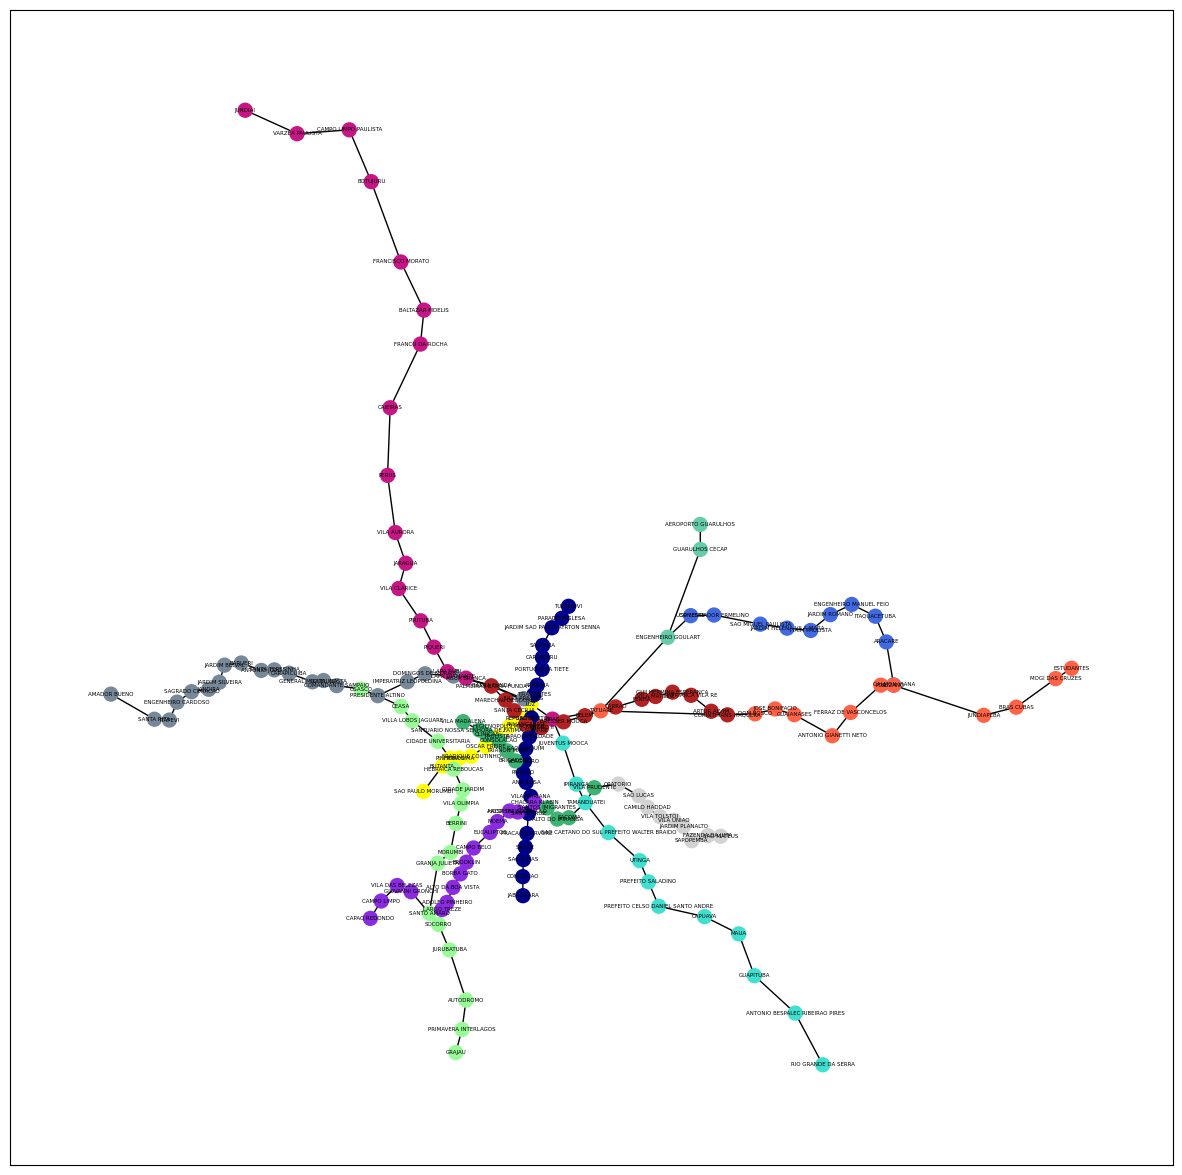

In [9]:
#visualizar grafo
plt.figure(figsize=(15,15))
position = nx.spring_layout(metro, seed=20)
nx.draw_networkx(metro, nx.get_node_attributes(metro, 'pos'), node_color=color_map, node_size=100, font_size=4)

### Função que calcula o menor trajeto entre duas estações

In [10]:
def verifica_estacao(estacao):
    if estacao.upper() in metro.nodes:
        return True
    else:
        return False

def melhor_trajeto(partida,chegada):

    if verifica_estacao(partida) == True and verifica_estacao(chegada) == True:
        trajeto = nx.shortest_path(metro, source=partida.upper(), target=chegada.upper(), method='dijkstra')
        return trajeto
    else:
        return f'Pelo menos uma das estações inseridas não está cadastrada. Verifique a inserção.'

def estacoes_inicial(inicial):
    lista_est = list(metro.nodes)
    lista_estacoes_inicial = []
    for indice in range(len(lista_est)):
        if inicial == str(lista_est[indice][0]):
            print(lista_est[indice])
    return f' '

### Interface para interação do usuário

In [15]:
while True :
    print('BEM VINDO AO SISTEMA DE LOCALIZAÇÃO DO METRO DE SP. \n Você pode: \n \
        1 - Buscar menor trajeto entre duas estações. \n \
        2 - Conferir estações cadastradas. \n \
        3 - Consultar metadados do grafo. \n \
        4 - Sair \n')
    opcao = int(input(f'Insira a opção desejada:  '))

    if opcao == 1:
        estacao1 = input('Digite o nome da estacao de partida: ')
        estacao2 = input('Digite o nome da estacao de chegada: ')

        print(f'O trajeto com menos conexões é dado por: \n {melhor_trajeto(estacao1,estacao2)} \n')

    if opcao == 2:
        inicial = input('Insira a incial da estação que deseja consultar: ').upper()
        print(estacoes_inicial(inicial))

    if opcao == 3:
        print(f'Metadados do Grafo do Metro: \n Quantidade de estações (nós): {len(metro.nodes)} \n Quantidade de conexões (arestas): {len(metro.edges)}. \n')

    if opcao == 4:
        break

BEM VINDO AO SISTEMA DE LOCALIZAÇÃO DO METRO DE SP. 
 Você pode: 
         1 - Buscar menor trajeto entre duas estações. 
         2 - Conferir estações cadastradas. 
         3 - Consultar metadados do grafo. 
         4 - Sair 

O trajeto com menos conexões é dado por: 
 ['LUZ', 'SAO BENTO', 'SE', 'JAPAO LIBERDADE', 'SAO JOAQUIM', 'VERGUEIRO', 'PARAISO', 'BRIGADEIRO', 'TRIANON MASP'] 

BEM VINDO AO SISTEMA DE LOCALIZAÇÃO DO METRO DE SP. 
 Você pode: 
         1 - Buscar menor trajeto entre duas estações. 
         2 - Conferir estações cadastradas. 
         3 - Consultar metadados do grafo. 
         4 - Sair 

Metadados do Grafo do Metro: 
 Quantidade de estações (nós): 171 
 Quantidade de conexões (arestas): 179.
BEM VINDO AO SISTEMA DE LOCALIZAÇÃO DO METRO DE SP. 
 Você pode: 
         1 - Buscar menor trajeto entre duas estações. 
         2 - Conferir estações cadastradas. 
         3 - Consultar metadados do grafo. 
         4 - Sair 

DOM BOSCO
DOMINGOS DE MORAIS
 
BEM VINDO 